# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mp
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder, StandardScaler
import scipy
import random
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
%matplotlib inline

# Importing Data

In [2]:
train_data = pd.read_csv("train.csv", index_col = 'id')
test_data = pd.read_csv("test.csv", index_col = 'id')
submission_data = pd.read_csv("sample_submission.csv", index_col = 'id')

In [3]:
train_data

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,0,0,0,T,N,Red,Trapezoid,Snake,India,Oboe,...,e027decef,1,Contributor,Freezing,k,K,dh,3,8,0
299996,0,0,0,F,Y,Green,Trapezoid,Lion,Russia,Piano,...,80f1411c8,2,Novice,Freezing,h,W,MO,3,2,0
299997,0,0,0,F,Y,Blue,Star,Axolotl,Russia,Oboe,...,314dcc15b,3,Novice,Boiling Hot,o,A,Bn,7,9,1


In [4]:
test_data

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
id,,,,,,,,,,,,,,,,,,,,,
300000,0,0,1,T,Y,Blue,Triangle,Axolotl,Finland,Piano,...,9d117320c,3c49b42b8,2,Novice,Warm,j,P,be,5,11
300001,0,0,0,T,N,Red,Square,Lion,Canada,Piano,...,46ae3059c,285771075,1,Master,Lava Hot,l,A,RP,7,5
300002,1,0,1,F,Y,Blue,Square,Dog,China,Piano,...,b759e21f0,6f323c53f,2,Expert,Freezing,a,G,tP,1,12
300003,0,0,1,T,Y,Red,Star,Cat,China,Piano,...,0b6ec68ff,b5de3dcc4,1,Contributor,Lava Hot,b,Q,ke,2,3
300004,0,1,1,F,N,Red,Trapezoid,Dog,China,Piano,...,f91f3b1ee,967cfa9c9,3,Grandmaster,Lava Hot,l,W,qK,4,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,0,0,0,F,N,Green,Square,Lion,Canada,Theremin,...,9e4b23160,acc31291f,1,Novice,Lava Hot,j,A,Gb,1,3
499996,1,0,0,F,Y,Green,Trapezoid,Lion,China,Piano,...,cfbd87ed0,eae3446d0,1,Contributor,Lava Hot,f,S,Ed,2,2
499997,0,1,1,T,Y,Green,Trapezoid,Lion,Canada,Oboe,...,1108bcd6c,33dd3cf4b,1,Novice,Boiling Hot,g,V,TR,3,1


In [5]:
submission_data

,target
id,
300000,0.5
300001,0.5
300002,0.5
300003,0.5
300004,0.5
...,...
499995,0.5
499996,0.5
499997,0.5


# Data Exploration

In [6]:
train_data.shape

(300000, 24)

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300000 entries, 0 to 299999
Data columns (total 24 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   bin_0   300000 non-null  int64 
 1   bin_1   300000 non-null  int64 
 2   bin_2   300000 non-null  int64 
 3   bin_3   300000 non-null  object
 4   bin_4   300000 non-null  object
 5   nom_0   300000 non-null  object
 6   nom_1   300000 non-null  object
 7   nom_2   300000 non-null  object
 8   nom_3   300000 non-null  object
 9   nom_4   300000 non-null  object
 10  nom_5   300000 non-null  object
 11  nom_6   300000 non-null  object
 12  nom_7   300000 non-null  object
 13  nom_8   300000 non-null  object
 14  nom_9   300000 non-null  object
 15  ord_0   300000 non-null  int64 
 16  ord_1   300000 non-null  object
 17  ord_2   300000 non-null  object
 18  ord_3   300000 non-null  object
 19  ord_4   300000 non-null  object
 20  ord_5   300000 non-null  object
 21  day     300000 non-null  int64 
 

In [8]:
train_data.describe()

,bin_0,bin_1,bin_2,ord_0,day,month,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.00000
mean,0.127503,0.256607,0.383223,1.479567,3.007817,5.771113,0.30588
std,0.333537,0.436761,0.486173,0.712524,1.817949,3.843519,0.46078
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.00000
25%,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,0.00000
50%,0.000000,0.000000,0.000000,1.000000,3.000000,4.000000,0.00000
75%,0.000000,1.000000,1.000000,2.000000,4.000000,9.000000,1.00000
max,1.000000,1.000000,1.000000,3.000000,7.000000,12.000000,1.00000


In [9]:
train_data.dtypes.value_counts()

object    17
int64      7
dtype: int64

In [10]:
cat_col = train_data.dtypes == np.object

In [11]:
categorical_cols = train_data.columns[cat_col]

In [12]:
categorical_cols

Index(['bin_3', 'bin_4', 'nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4', 'nom_5',
       'nom_6', 'nom_7', 'nom_8', 'nom_9', 'ord_1', 'ord_2', 'ord_3', 'ord_4',
       'ord_5'],
      dtype='object')

In [13]:
train_data.nunique()

bin_0         2
bin_1         2
bin_2         2
bin_3         2
bin_4         2
nom_0         3
nom_1         6
nom_2         6
nom_3         6
nom_4         4
nom_5       222
nom_6       522
nom_7      1220
nom_8      2215
nom_9     11981
ord_0         3
ord_1         5
ord_2         6
ord_3        15
ord_4        26
ord_5       192
day           7
month        12
target        2
dtype: int64

# DATA VISUALIZATION

## Target Value distribution

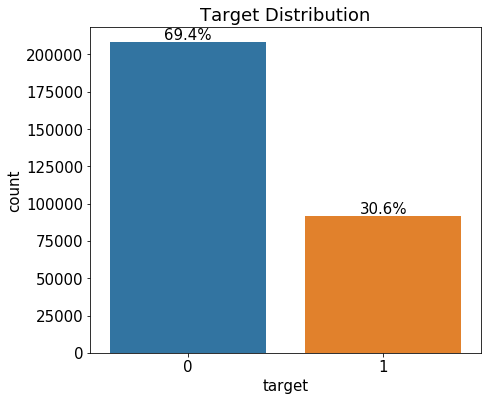

In [14]:
mp.rc('font', size=15)
plt.figure(figsize=(7, 6))

ax = sns.countplot(x='target', data=train_data)

total_size = len(train_data) # Total number of training data

# Circulates rectangle object, showing target values ratio at the top of the bar
for patch in ax.patches:
    height = patch.get_height() # Rectangle height (Data Count)
    width = patch.get_width() # Rectangle width
    left_coord = patch.get_x() # Rectangle x-axis of the left border
    percent = height/total_size*100 # target values ratio
    
    # Enter text at (x, y)coordinates 
    ax.text(x=left_coord + width/2.0, # x-axis position
            y=height + 1500, # y-axis position
            s='{:1.1f}%'.format(percent), # Text
            ha='center') # Center alignment

ax.set_title('Target Distribution');

## Binary value distribution 

In [15]:
for i in range(3):
    col = 'ord_' + str(i)
    print(f'{col} unique values: {train_data[col].unique()}')

ord_0 unique values: [2 1 3]
ord_1 unique values: ['Grandmaster' 'Expert' 'Novice' 'Contributor' 'Master']
ord_2 unique values: ['Cold' 'Hot' 'Lava Hot' 'Boiling Hot' 'Freezing' 'Warm']


In [16]:
for i in range(3, 6):
    col = 'ord_' + str(i)
    print(f'{col} unique values: {train_data[col].unique()}')

ord_3 unique values: ['h' 'a' 'i' 'j' 'g' 'e' 'd' 'b' 'k' 'f' 'l' 'n' 'o' 'c' 'm']
ord_4 unique values: ['D' 'A' 'R' 'E' 'P' 'K' 'V' 'Q' 'Z' 'L' 'F' 'T' 'U' 'S' 'Y' 'B' 'H' 'J'
 'N' 'G' 'W' 'I' 'O' 'C' 'X' 'M']
ord_5 unique values: ['kr' 'bF' 'Jc' 'kW' 'qP' 'PZ' 'wy' 'Ed' 'qo' 'CZ' 'qX' 'su' 'dP' 'aP'
 'MV' 'oC' 'RL' 'fh' 'gJ' 'Hj' 'TR' 'CL' 'Sc' 'eQ' 'kC' 'qK' 'dh' 'gM'
 'Jf' 'fO' 'Eg' 'KZ' 'Vx' 'Fo' 'sV' 'eb' 'YC' 'RG' 'Ye' 'qA' 'lL' 'Qh'
 'Bd' 'be' 'hT' 'lF' 'nX' 'kK' 'av' 'uS' 'Jt' 'PA' 'Er' 'Qb' 'od' 'ut'
 'Dx' 'Xi' 'on' 'Dc' 'sD' 'rZ' 'Uu' 'sn' 'yc' 'Gb' 'Kq' 'dQ' 'hp' 'kL'
 'je' 'CU' 'Fd' 'PQ' 'Bn' 'ex' 'hh' 'ac' 'rp' 'dE' 'oG' 'oK' 'cp' 'mm'
 'vK' 'ek' 'dO' 'XI' 'CM' 'Vf' 'aO' 'qv' 'jp' 'Zq' 'Qo' 'DN' 'TZ' 'ke'
 'cG' 'tP' 'ud' 'tv' 'aM' 'xy' 'lx' 'To' 'uy' 'ZS' 'vy' 'ZR' 'AP' 'GJ'
 'Wv' 'ri' 'qw' 'Xh' 'FI' 'nh' 'KR' 'dB' 'BE' 'Bb' 'mc' 'MC' 'tM' 'NV'
 'ih' 'IK' 'Ob' 'RP' 'dN' 'us' 'dZ' 'yN' 'Nf' 'QM' 'jV' 'sY' 'wu' 'SB'
 'UO' 'Mx' 'JX' 'Ry' 'Uk' 'uJ' 'LE' 'ps' 'kE' 'MO' 'kw' 'y

In [17]:
print('day unique values:', train_data['day'].unique())
print('month unique values:', train_data['month'].unique())
print('target unique values:', train_data['target'].unique())

day unique values: [2 7 5 4 3 1 6]
month unique values: [ 2  8  1  4 10  3  7  9 12 11  5  6]
target unique values: [0 1]


In [18]:
def get_row_col_idx(idx):
    '''Returns the position of rows and columns in a subplot'''
    row_idx = idx//2
    if idx%2 == 0:
        col_idx = 0
    else:
        col_idx = 1
    return row_idx, col_idx

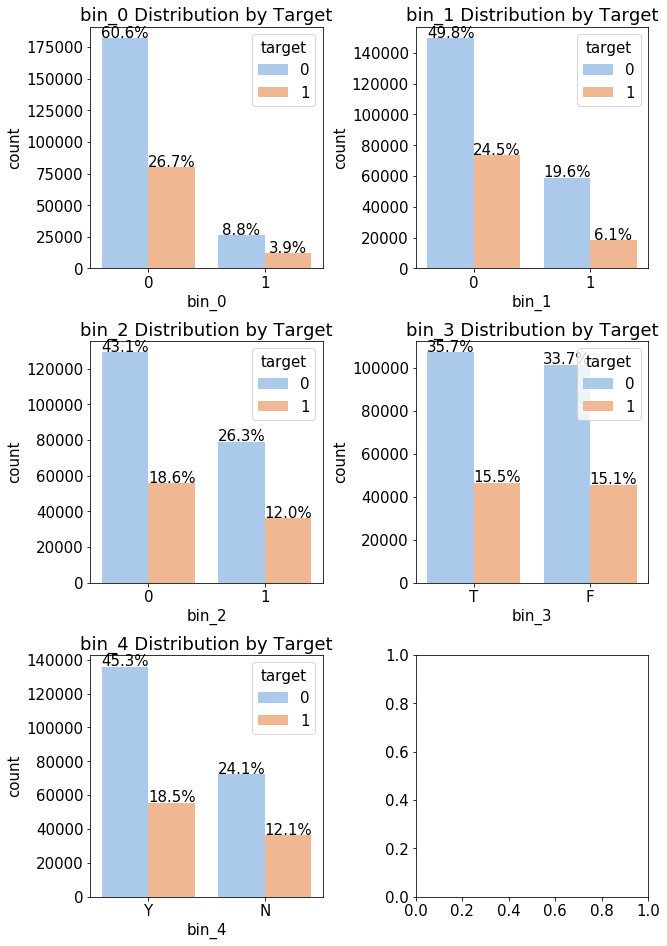

In [19]:
bin_cols = ['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4']

def write_percent(ax):
    '''Displays target values ratio at the top of the bar graph'''
    for patch in ax.patches:
        height = patch.get_height()
        width = patch.get_width() 
        left_coord = patch.get_x()
        percent = height/total_size*100
        
        ax.text(left_coord + width/2.0, 
                height+500, 
                '{:1.1f}%'.format(percent), 
                ha='center') 

figure, axes = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(10, 16)
plt.subplots_adjust(wspace=0.4, hspace=0.3)

for idx, col in enumerate(train_data[bin_cols]): 
    row_idx, col_idx = get_row_col_idx(idx)
    ax = axes[row_idx, col_idx]
    
    sns.countplot(x=col, 
                  data=train_data, 
                  hue=train_data['target'], 
                  palette='pastel',
                  ax=ax) 
    
    write_percent(ax)
    ax.set_title(f'{col} Distribution by Target')

## Nominal Feature distribution 

In [20]:
crosstab = pd.crosstab(train_data['nom_0'], train_data['target'], normalize='index')*100
crosstab.reset_index()

target,nom_0,0,1
0,Blue,75.820976,24.179024
1,Green,67.285478,32.714522
2,Red,64.894827,35.105173


In [21]:
def get_crosstab(df, col):
    '''create crosstab'''
    crosstab = pd.crosstab(df[col], df['target'], normalize='index')*100
    crosstab = crosstab.reset_index()
    return crosstab

In [22]:
def plot_pointplot(ax, col, crosstab):
    '''Plot target value 1 ratio on common x-axis as a point plot'''
    ax2 = ax.twinx() # Create a common x-axis
    ax2 = sns.pointplot(x=col, y=1, data=crosstab,
                        order=crosstab[col].values, # Point Plot Order
                        color='black', # Point Plot Color
                        legend=False)
    ax2.set_ylim(crosstab[1].min()-5,crosstab[1].max()*1.1) #Set y-axis range
    ax2.set_ylabel("Target 1 Ratio(%)")

In [23]:
def plot_cat_dist_with_true_ratio(df, cols, num_rows, num_cols, size=(15, 20)):
    figure, axes = plt.subplots(nrows=num_rows, ncols=num_cols)
    figure.set_size_inches(size[0], size[1])

    for idx, col in enumerate(df[cols]): 
        crosstab = get_crosstab(df, col) # create crosstab
        
        # Set the axis on which to plot the graph
        if num_cols == 1:
            ax = axes[idx]
        else:
            row_idx, col_idx = get_row_col_idx(idx)
            ax = axes[row_idx, col_idx]
            
        sns.countplot(x=col, data=train_data, 
                      order=crosstab[col].values, 
                      color='skyblue', 
                      ax=ax) 

        write_percent(ax) # Indicate ratio by unique values
        
        plot_pointplot(ax, col, crosstab) # plot Pointplot
        
        ax.set_title(f'{col} Distribution') # Plot title
        
    plt.subplots_adjust(hspace=0.3, wspace=0.45)


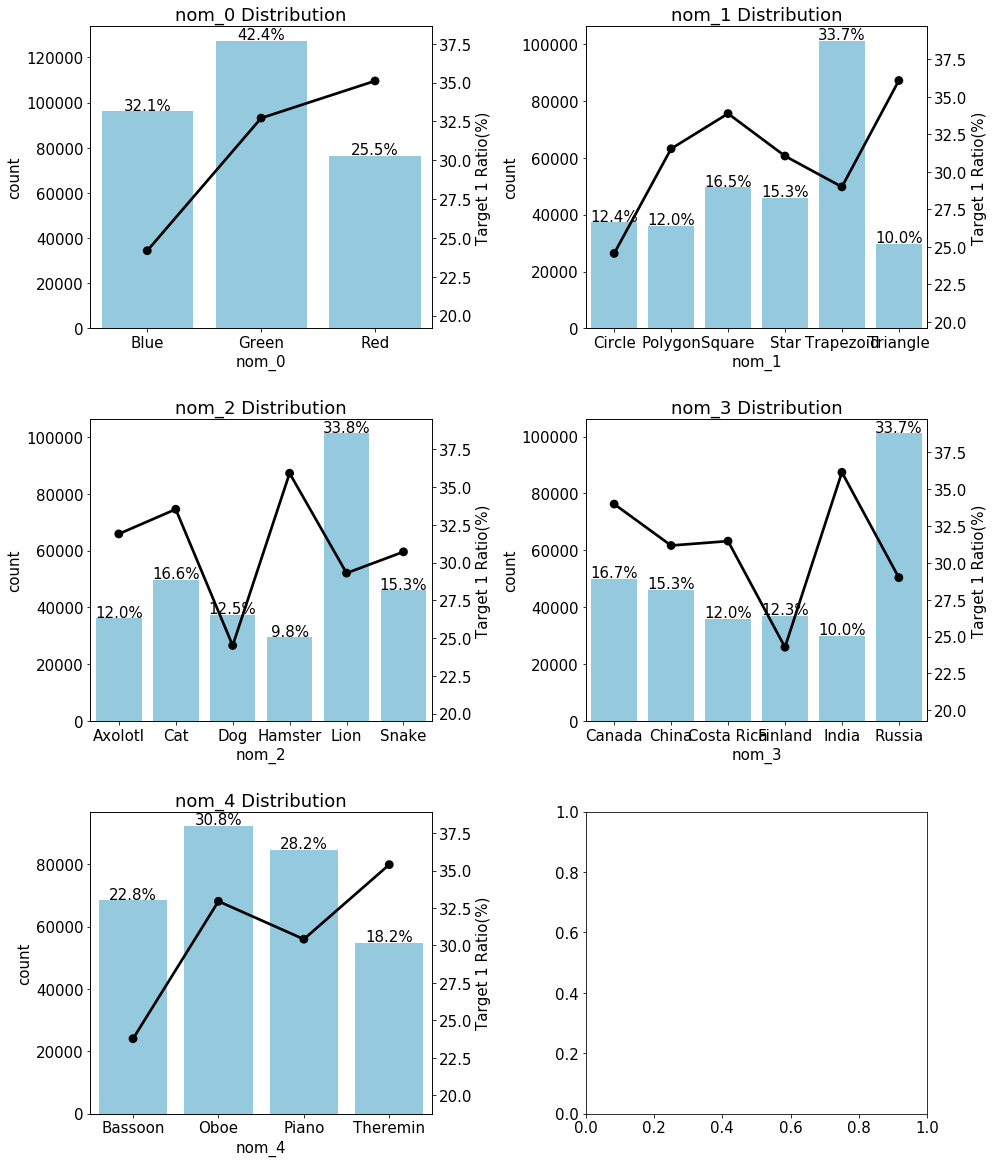

In [24]:
nom_cols = ['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4'] # Nominal features
plot_cat_dist_with_true_ratio(train_data, nom_cols, num_rows=3, num_cols=2)

## Ordinal feature distribution

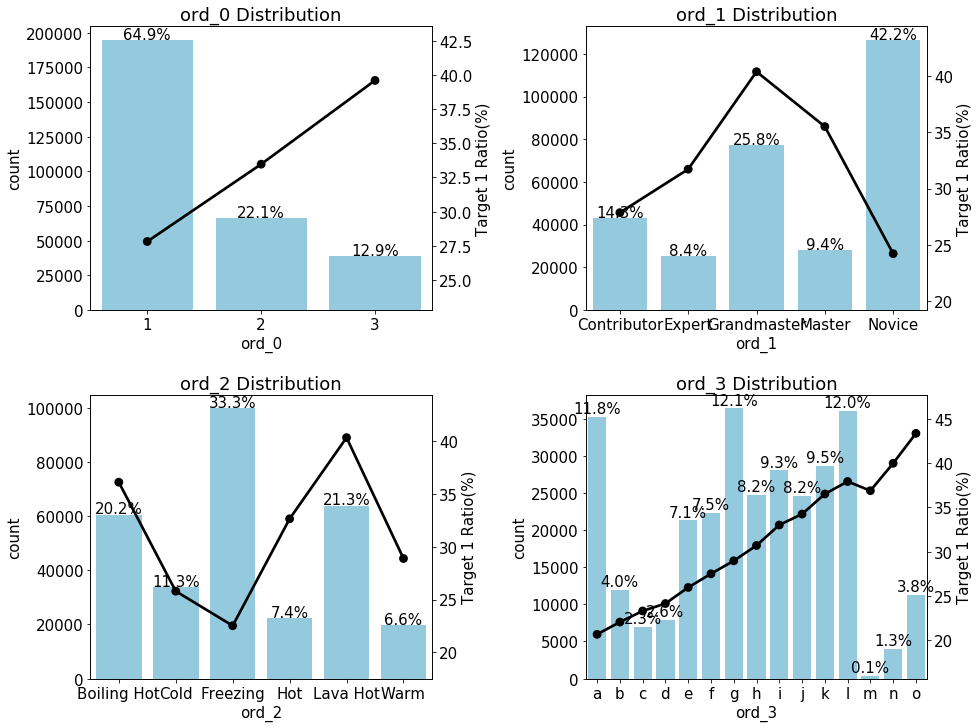

In [25]:
ord_cols = ['ord_0', 'ord_1', 'ord_2', 'ord_3'] # Ordinal features
plot_cat_dist_with_true_ratio(train_data, ord_cols, 
                              num_rows=2, num_cols=2, size=(15, 12))

In [26]:
from pandas.api.types import CategoricalDtype 

ord_1_value = ['Novice', 'Contributor', 'Expert', 'Master', 'Grandmaster']
ord_2_value = ['Freezing', 'Cold', 'Warm', 'Hot', 'Boiling Hot', 'Lava Hot']

# Ordered categorical data types
ord_1_dtype = CategoricalDtype(categories=ord_1_value, ordered=True)
ord_2_dtype = CategoricalDtype(categories=ord_2_value, ordered=True)

# Change data types
train_data['ord_1'] = train_data['ord_1'].astype(ord_1_dtype)
train_data['ord_2'] = train_data['ord_2'].astype(ord_2_dtype)

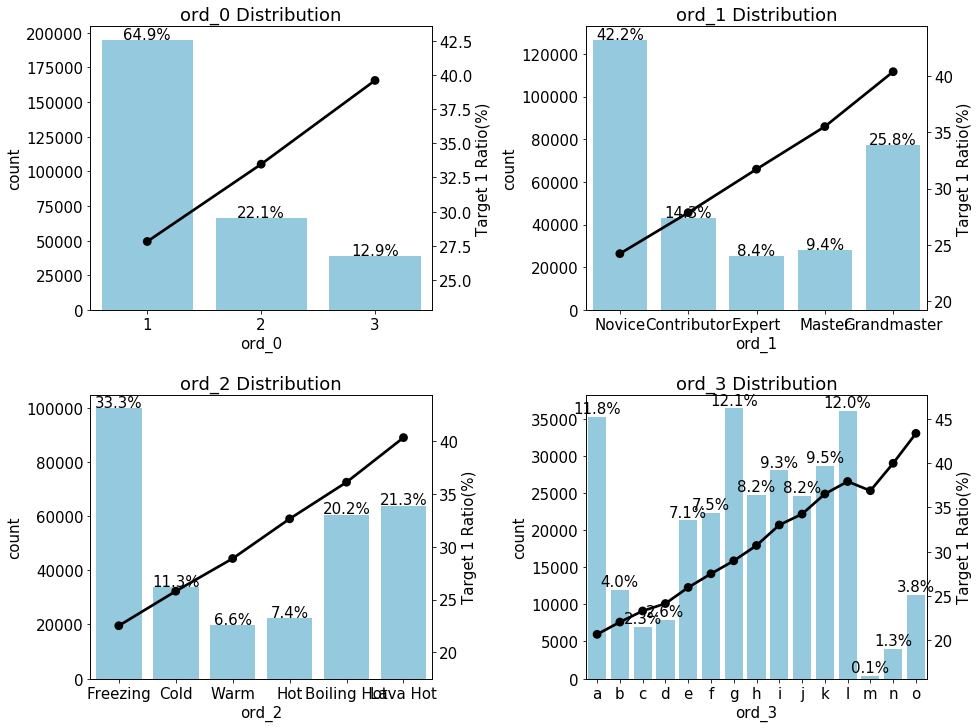

In [27]:
plot_cat_dist_with_true_ratio(train_data, ord_cols, num_rows=2, num_cols=2, size=(15, 12))

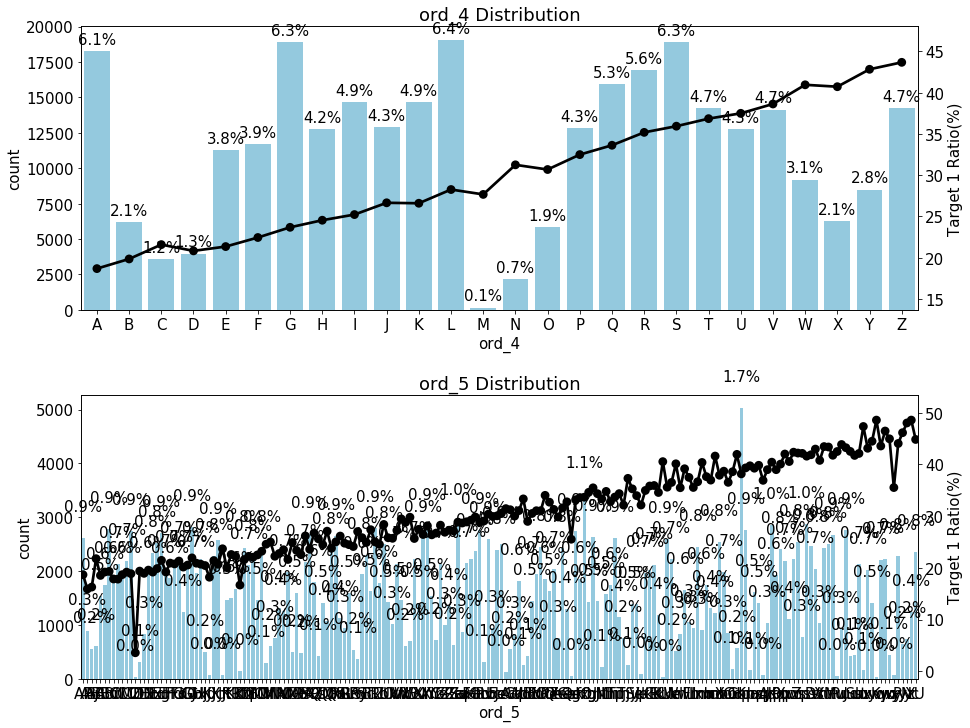

In [28]:
plot_cat_dist_with_true_ratio(train_data, ['ord_4', 'ord_5'], num_rows=2, num_cols=1, size=(15, 12))

## Date Features Distribution 

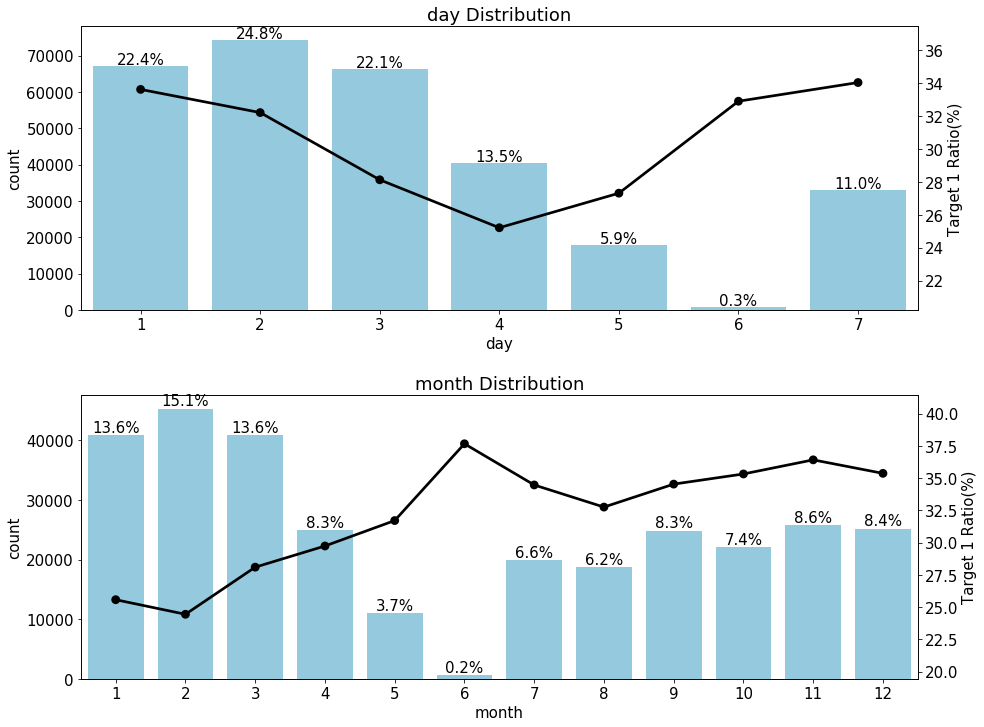

In [29]:
date_cols = ['day', 'month']
plot_cat_dist_with_true_ratio(train_data, date_cols, num_rows=2, num_cols=1, size=(15, 12))

# Exploratory Data Analysis

In [30]:
train_target = train_data.target
train_data.drop('target', inplace=True, axis=1)

In [31]:
binary_data = [f'bin_{i}' for i in range(5)]

binary_categorical_data = train_data.loc[:, binary_data]

In [32]:
binary_categorical_data

,bin_0,bin_1,bin_2,bin_3,bin_4
id,,,,,
0,0,0,0,T,Y
1,0,1,0,T,Y
2,0,0,0,F,Y
3,0,1,0,F,Y
4,0,0,0,F,N
...,...,...,...,...,...
299995,0,0,0,T,N
299996,0,0,0,F,Y
299997,0,0,0,F,Y


In [33]:
binary_categorical_data['bin_3'] = binary_categorical_data['bin_3'].replace(to_replace=['F', 'T'], 
                                                                            value=['0', '1']).astype(int)

binary_categorical_data['bin_4'] = binary_categorical_data['bin_4'].replace(to_replace=['Y', 'N'], 
                                                                            value=['1', '0']).astype(int)

In [34]:
binary_categorical_data

,bin_0,bin_1,bin_2,bin_3,bin_4
id,,,,,
0,0,0,0,1,1
1,0,1,0,1,1
2,0,0,0,0,1
3,0,1,0,0,1
4,0,0,0,0,0
...,...,...,...,...,...
299995,0,0,0,1,0
299996,0,0,0,0,1
299997,0,0,0,0,1


In [35]:
ordinal_data = [f'ord_{i}' for i in range(6)]

ordinal_categorical_data = train_data.loc[:, ordinal_data]

for ordinal in ordinal_data:
    print(f"""
for {ordinal}: uniques are {ordinal_categorical_data[ordinal].unique()}
    """)


for ord_0: uniques are [2 1 3]
    

for ord_1: uniques are ['Grandmaster', 'Expert', 'Novice', 'Contributor', 'Master']
Categories (5, object): ['Novice' < 'Contributor' < 'Expert' < 'Master' < 'Grandmaster']
    

for ord_2: uniques are ['Cold', 'Hot', 'Lava Hot', 'Boiling Hot', 'Freezing', 'Warm']
Categories (6, object): ['Freezing' < 'Cold' < 'Warm' < 'Hot' < 'Boiling Hot' < 'Lava Hot']
    

for ord_3: uniques are ['h' 'a' 'i' 'j' 'g' 'e' 'd' 'b' 'k' 'f' 'l' 'n' 'o' 'c' 'm']
    

for ord_4: uniques are ['D' 'A' 'R' 'E' 'P' 'K' 'V' 'Q' 'Z' 'L' 'F' 'T' 'U' 'S' 'Y' 'B' 'H' 'J'
 'N' 'G' 'W' 'I' 'O' 'C' 'X' 'M']
    

for ord_5: uniques are ['kr' 'bF' 'Jc' 'kW' 'qP' 'PZ' 'wy' 'Ed' 'qo' 'CZ' 'qX' 'su' 'dP' 'aP'
 'MV' 'oC' 'RL' 'fh' 'gJ' 'Hj' 'TR' 'CL' 'Sc' 'eQ' 'kC' 'qK' 'dh' 'gM'
 'Jf' 'fO' 'Eg' 'KZ' 'Vx' 'Fo' 'sV' 'eb' 'YC' 'RG' 'Ye' 'qA' 'lL' 'Qh'
 'Bd' 'be' 'hT' 'lF' 'nX' 'kK' 'av' 'uS' 'Jt' 'PA' 'Er' 'Qb' 'od' 'ut'
 'Dx' 'Xi' 'on' 'Dc' 'sD' 'rZ' 'Uu' 'sn' 'yc' 'Gb' 'Kq' 'dQ' 'hp'

In [36]:
ordinal_categorical_data['ord_0'] = ordinal_categorical_data['ord_0'] - 1

mapper_ord_1 = {'Novice': 0, 'Contributor': 1, 'Expert': 2, 'Master': 3, 'Grandmaster': 4}

mapper_ord_2 = {'Freezing': 0, 'Cold': 1, 'Warm': 2, 'Hot': 3,'Boiling Hot': 4, 'Lava Hot': 5}

mapper_ord_3 = {'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'h': 7, 
                'i': 8, 'j': 9, 'k': 10, 'l': 11, 'm': 12, 'n': 13, 'o': 14}

mapper_ord_4 = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 
                'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14,
                'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 
                'W': 22, 'X': 23, 'Y': 24, 'Z': 25}

for col, mapper in zip(['ord_1', 'ord_2', 'ord_3', 'ord_4'], 
                       [mapper_ord_1, mapper_ord_2, mapper_ord_3, mapper_ord_4]):
    ordinal_categorical_data[col] = ordinal_categorical_data[col].replace(mapper)

ordinal_categorical_data.head()

,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5
id,,,,,,
0,1,4,1,7,3,kr
1,0,4,3,0,0,bF
2,0,2,5,7,17,Jc
3,0,4,4,8,3,kW
4,0,4,0,0,17,qP


In [37]:
ordinal_encoder = OrdinalEncoder(categories='auto')

ord_5_matrix = ordinal_categorical_data.ord_5.values.reshape(-1, 1)

ordinal_encoder.fit(ord_5_matrix)

ordinal_categorical_data.ord_5 = ordinal_encoder.transform(ord_5_matrix)

ordinal_categorical_data.head()

,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5
id,,,,,,
0,1,4,1,7,3,136.0
1,0,4,3,0,0,93.0
2,0,2,5,7,17,31.0
3,0,4,4,8,3,134.0
4,0,4,0,0,17,158.0


In [38]:
ordinal_scaler = StandardScaler()

ordinal_categorical_data[ordinal_data] = ordinal_scaler.fit_transform(ordinal_categorical_data)

ordinal_categorical_data.head()

,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5
id,,,,,,
0,0.730409,1.416956,-0.659213,0.102080,-1.338244,0.758831
1,-0.673054,1.416956,0.325164,-1.725898,-1.748280,-0.017107
2,-0.673054,0.224781,1.309542,0.102080,0.575258,-1.135901
3,-0.673054,1.416956,0.817353,0.363220,-1.338244,0.722741
4,-0.673054,1.416956,-1.151402,-1.725898,0.575258,1.155823


In [39]:
norminal_data = [f'nom_{i}' for i in range(10)]

norminal_categorical_data = train_data.loc[:, norminal_data]

for col in norminal_categorical_data.columns:
    print(f"{col}: items_length = {len(train_data[col].unique())}")

nom_0: items_length = 3
nom_1: items_length = 6
nom_2: items_length = 6
nom_3: items_length = 6
nom_4: items_length = 4
nom_5: items_length = 222
nom_6: items_length = 522
nom_7: items_length = 1220
nom_8: items_length = 2215
nom_9: items_length = 11981


In [40]:
ohe_encoder = OneHotEncoder()

nom_0_9_matrix = norminal_categorical_data[norminal_data].values
ohe_trans = ohe_encoder.fit_transform(nom_0_9_matrix)

ohe_trans

<300000x16185 sparse matrix of type '<class 'numpy.float64'>'
	with 3000000 stored elements in Compressed Sparse Row format>

In [41]:
day_n_month = ['day', 'month']

day_month_data = train_data.loc[:, day_n_month]

for dm in day_n_month:
    print(f"""
for {dm}: uniques are {day_month_data[dm].unique()}
    """)


for day: uniques are [2 7 5 4 3 1 6]
    

for month: uniques are [ 2  8  1  4 10  3  7  9 12 11  5  6]
    


In [42]:
day_month_data['day'] = day_month_data['day'] - 1
day_month_data['month'] = day_month_data['month'] - 1

day_month_data.head()

,day,month
id,,
0,1,1
1,6,7
2,6,1
3,1,0
4,6,7


In [43]:
dm_scaler = StandardScaler()

day_month_data[day_n_month] = dm_scaler.fit_transform(day_month_data)

day_month_data.head()

,day,month
id,,
0,-0.554371,-0.981163
1,2.195985,0.579909
2,2.195985,-0.981163
3,-0.554371,-1.241342
4,2.195985,0.579909


In [44]:
#Combine Everything
def prep_data(train_data, test_data):
    data = pd.concat([train_data, test_data])
    
    first_half = binary_data + ordinal_data
    second_half = day_n_month
    
    # Handling binary data
    data['bin_3'] = data['bin_3'].replace(to_replace=['F', 'T'], value=['0', '1']).astype(int)
    data['bin_4'] = data['bin_4'].replace(to_replace=['Y', 'N'], value=['1', '0']).astype(int)
    
    # Handling ordinal data
    data['ord_0'] = data['ord_0'] - 1
    
    for col, mapper in zip(
        ['ord_1', 'ord_2', 'ord_3', 'ord_4'],        
        [mapper_ord_1, mapper_ord_2, mapper_ord_3, mapper_ord_4]
    ):
        data[col] = data[col].replace(mapper)
        
    # Handling ord_5 high cardinality data
    ord_5_matrix = data.ord_5.values.reshape(-1, 1)
    data.ord_5 = ordinal_encoder.fit_transform(ord_5_matrix)
    
    # Scaling Ordinal Data
    data[ordinal_data] = ordinal_scaler.fit_transform(data[ordinal_data])
        
    # One Hot Encoding on norminal data nom_0 - nom_4
    nom_0_9_matrix = data[norminal_data].values
    ohe_trans = ohe_encoder.fit_transform(nom_0_9_matrix)
    
    # Scaling Day and Month Data
    data['day'] = data['day'] - 1
    data['month'] = data['month'] - 1
    
    data[day_n_month] = dm_scaler.fit_transform(data[day_n_month])
    
    part_one_matrix = scipy.sparse.coo_matrix(
        data.loc[:, first_half].to_numpy()
    ).astype('float64')

    part_two_matrix = scipy.sparse.coo_matrix(
        data.loc[:, second_half].to_numpy()
    ).astype('float64')
    
    
    result =  scipy.sparse.hstack([
        part_one_matrix, 
        ohe_trans, 
        part_two_matrix
    ]).tocsr()
    
    return result[:train_data.shape[0]], result[train_data.shape[0]:]


In [45]:
train_d = train_data.copy()
test_d = test_data.copy()

train_d, test_d = prep_data(train_d, test_d)

train_d.shape, test_d.shape

((300000, 16289), (200000, 16289))

# Model Training

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(train_d,train_target, test_size = 0.2, random_state = 0)

In [47]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((240000, 16289), (60000, 16289), (240000,), (60000,))

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_val, y_train, y_val):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_val, y_val)
    return model_scores

In [49]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_val=X_val,
                             y_train=y_train,
                             y_val=y_val)

model_scores

C:\Users\bhara_5sejtsc\ML\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'KNN': 0.6996333333333333,
 'Logistic Regression': 0.75885,
 'Random Forest': 0.7181666666666666}

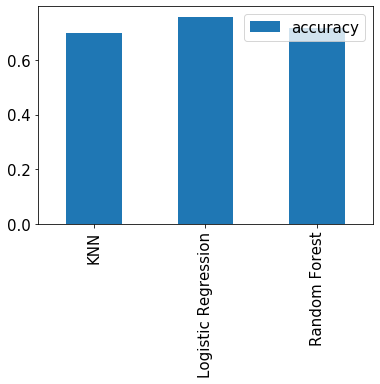

In [50]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

# Logistic Regression  Parameter Tuning

In [51]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [52]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.08858667904100823}

In [53]:
rs_log_reg.score(X_val, y_val)

0.7630833333333333

# Random Forest Parameter Tuning

In [ ]:
# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
# Find the best parameters
rs_rf.best_params_

In [ ]:
# Evaluate the randomized search random forest model
rs_rf.score(X_test, y_test)